## Test LSTMs on Stock Market Prices.

The data set we use here are the GE stock prices of the last 50 years. [Source](https://www.kaggle.com/darkknight91/ge-stock/kernels)

In [31]:
import pandas as pd
import numpy as np
data = pd.read_csv('ge.us.txt')

In [180]:
data.keys()
data

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,0
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,0
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,0
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244,0
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430,0
5,1962-01-09,0.5957,0.6037,0.5878,0.5957,2778285,0
6,1962-01-10,0.5957,0.6037,0.5957,0.5957,2337096,0
7,1962-01-11,0.5957,0.5957,0.5878,0.5957,1943605,0
8,1962-01-12,0.5957,0.6037,0.5878,0.5878,2015151,0
9,1962-01-15,0.5957,0.5957,0.5957,0.5957,2527879,0


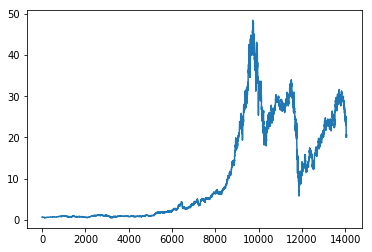

In [43]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(data['High'])
plt.show()

## Normalize Data
Because e.g. Volume are very large numbers that might affect the outcome.

In [181]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = data.keys()
train_cols = train_cols.drop('Date')  # The dates are not relevant, only time series matters
train_cols = train_cols.drop('OpenInt')  # OpenInt is always = 0
train_cols = train_cols.drop('Close')  # Close (t) = Open(t-1)
df_train, df_test = train_test_split(data, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))

# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train_raw = min_max_scaler.fit_transform(x)
x_test_raw = min_max_scaler.transform(df_test.loc[:,train_cols])

Train and Test size 11246 2812


## Input data
The input data is split into time steps for every day in the dataset. And at each time step we feed all the available information of that day. Which means we feed all the values of all keys.
The number of keys is the number of features.

In [182]:
x_test_raw.shape

(2812, 4)

## Build time series
This step makes the problem a supervised problem. We have to ask ourselfs first, how many days we want to feed into the NN to predict the next day. Let's assume we would like to feed always 10 days into the NN and predict the 11th day. Therefore we need to split our dataset into tensors that contain the features of 10 days and at the same time we need a label for this input tensor which contains the features of the 11th day.

Let's call the length of the time series `NUMBER_OF_STEPS`

In [183]:
def build_timeseries(input_tensor, TIME_STEPS):
    # the column TIME_STEPS+1 is the column that would act as output column (label)
    # total number of time-series samples would be len(input_tensor) - TIME_STEPS
    dim_nr_series = input_tensor.shape[0] - TIME_STEPS
    dim_feature = input_tensor.shape[1]
    x = np.zeros((dim_nr_series, TIME_STEPS, dim_feature)) #input is set of nr of series, with n times steps and k features
    y = np.zeros((dim_nr_series, dim_feature)) # y should be dim nr of series, k features. For TIME_STEP+1
    print(y.shape)
    print(input_tensor.shape)
    for i in range(dim_nr_series):
        x[i] = input_tensor[i:TIME_STEPS+i]
        y[i] = input_tensor[TIME_STEPS+i]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [184]:
NUMBER_OF_STEPS = 10
x_train, y_train = build_timeseries(x_train_raw, NUMBER_OF_STEPS)
print(y_train[0])
x_test, y_test = build_timeseries(x_test_raw, NUMBER_OF_STEPS)

(11236, 4)
(11246, 4)
length of time-series i/o (11236, 10, 4) (11236, 4)
[0.00289013 0.00285047 0.00306629 0.01267147]
(2802, 4)
(2812, 4)
length of time-series i/o (2802, 10, 4) (2802, 4)


## Define Model

In [185]:
import sys
import torch
import torch.nn as nn
from torch.autograd import Variable

class LSTM(nn.Module):

    def __init__(self, input_dim, feature_dim, output_dim=1,
                    num_layers=2):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.feature_dim = feature_dim
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.feature_dim, self.num_layers, batch_first = True)

        # Define the output layer
        self.linear = nn.Linear(self.feature_dim, output_dim)

    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [batch_size, input_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (batch_size, num_layers, hidden_dim).
        lstm_out, self.hidden = self.lstm(input)
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(lstm_out[:,-1])
        return y_pred

model = LSTM(lstm_input_size, feature_dim, output_dim=output_dim, num_layers=num_layers)
print(model)

LSTM(
  (lstm): LSTM(5, 5, num_layers=2, batch_first=True)
  (linear): Linear(in_features=5, out_features=5, bias=True)
)


## Test model step by step

In [186]:
num_layers = 1 # This is a hyperparameter I think...
model = nn.LSTM(lstm_input_size, feature_dim, num_layers, batch_first = True)
x_torch = torch.Tensor(x_train)
print(x_torch.shape)
out, hidden = model(x_torch)
print(out[-1].shape)
linear = nn.Linear(feature_dim, output_dim)
y = linear(out[:,-1]) # take whole batch but only last vector of time sequence.
print(y.shape)

torch.Size([11236, 10, 4])


RuntimeError: input.size(-1) must be equal to input_size. Expected 5, got 4

## Train model

In [218]:
lstm_input_size = 4
feature_dim = 4
batch_size = 32
output_dim = feature_dim
num_layers = 10

num_epochs = 10
learning_rate = 0.001

## We need put the data in a Dataset and then make a data generator for easier training

In [219]:
from torch.utils.data.dataset import Dataset

class DatasetCustom(Dataset):
    
    def __init__(self, img, label, transform=None):
        self.transform = transform
        self.img = img
        self.label = label
        
    def __len__(self):
        return self.img.shape[0]
    
    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, i don't use ToTensor() method of torchvision.transforms
        # so you can convert numpy ndarray shape to tensor in PyTorch (H, W, C) --> (C, H, W)
        image = self.img[index]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, self.label[index] 

In [189]:
import torch.utils.data
x_tr, y_tr = torch.Tensor(x_train), torch.Tensor(y_train)
dataset =   DatasetCustom(x_tr, y_tr) 
training_generator = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
print(x_tr.shape, y_tr.shape)
next(iter(training_generator))[1].shape

torch.Size([11236, 10, 4]) torch.Size([11236, 4])


torch.Size([32, 4])

In [220]:
model = LSTM(lstm_input_size, feature_dim, output_dim=feature_dim, num_layers=num_layers)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [221]:
hist = np.zeros(num_epochs)
print(num_epochs)
for t in range(num_epochs):
    # Clear stored gradient
    
    for x, y in training_generator:
        model.zero_grad()

        # Initialise hidden state
        # Don't do this if you want your LSTM to be stateful
        # model.hidden = model.init_hidden()

        # Forward pass
        y_pred = model(x)

        loss = loss_fn(y_pred, y)
        hist[t] = loss.item()

        # Zero out gradient, else they will accumulate between epochs
        optimiser.zero_grad()

        # Backward pass
        loss.backward()

        # Update parameters
        optimiser.step()
    total_loss = loss_fn(model(x_tr), y_tr)    
    print("Epoch ", t, "MSE: ", loss.item())   

10
Epoch  0 MSE:  0.4413459002971649
Epoch  1 MSE:  0.09709317982196808
Epoch  2 MSE:  0.02044581063091755
Epoch  3 MSE:  0.015472603030502796
Epoch  4 MSE:  0.06974542140960693
Epoch  5 MSE:  0.003414563834667206
Epoch  6 MSE:  0.01395118422806263
Epoch  7 MSE:  0.047151871025562286
Epoch  8 MSE:  0.0368722602725029
Epoch  9 MSE:  0.03263392299413681


# Evaluate Training accuracy

## Calculate Test loss

In [222]:
y_pred = model(torch.Tensor(x_test))
y_te = torch.Tensor(y_test)
total_loss = loss_fn(y_pred, y_te)  
print(total_loss.item())
print(y_pred.shape)

1150.62158203125
torch.Size([2802, 4])


## Compare prediction with actual data

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
(2812, 4)


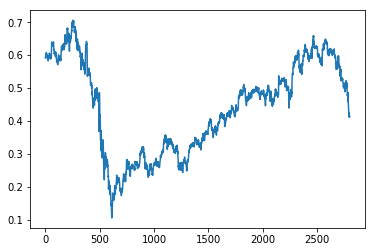

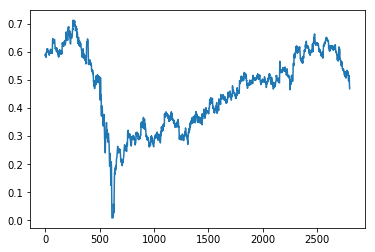

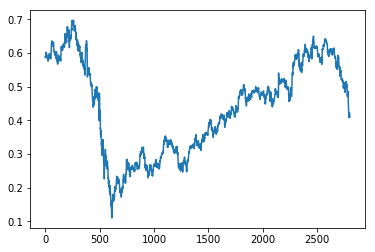

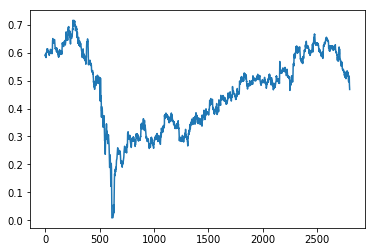

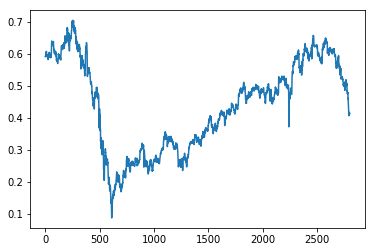

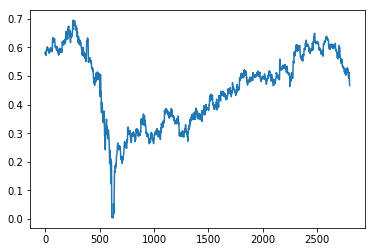

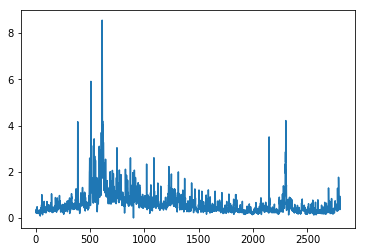

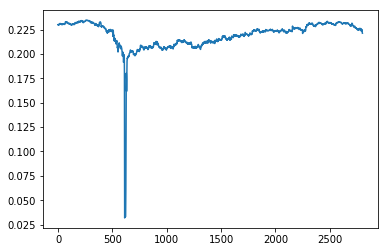

In [223]:
print(data.keys())
print(x_test_raw.shape)
for i in range(feature_dim):
    plt.plot(x_test_raw[10:,i]) # First 10 we don't have predictions
    plt.show()
    plt.plot(y_pred.detach().numpy()[:,i])
    plt.show()

## See if algorithm predicts increase or decrease in stock price accurately.
First we would like to know if we can predict that the stock price goes up or down next day.

The direction vector contains `-1` if the stock price is lower at time step `t+1` than at time `t`. And `+1` if the price goes up.

In [230]:
index = 3
grads_test = []
grads_pred = []
x = x_test_raw[10:,index]
y = y_pred.detach().numpy()[:,index]
for j in range(x.shape[0]-1):
    grads_test.append(x[j+1]-x[j])
    grads_pred.append(y[j+1]-y[j])
direction_test = (np.array(grads_test)>0)*2-1    
direction_pred = (np.array(grads_pred)>0)*2-1 

## Compare prediction with test set.
multiply the directions if the product is negative the prediction does not sgree with the data.

In [231]:
product = direction_test*direction_pred
unique, counts = np.unique(product, return_counts=True)
dict(zip(unique, counts))

{-1: 1389, 1: 1412}

In [236]:
print('the prediction accuracy for falling and increasing stock prices is {} percent'.format(np.round(counts[1]/np.sum(counts)*100, decimals=2)))

the prediction accuracy for falling and increasing stock prices is 50.41 percent
